# INFO 70041 - Mechine Learning
Kamran Rahnama - Assignment 1

# Import Data

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline
import seaborn as sns
#from sklearn.preprocessing import StandardScaler


In [98]:
dt = pd.read_csv("cancer_DecisionTree.csv")
dt.head()

,ID,Clum_thick,Unif_cell_size,Unif_cell_shape,Marg_adhesion,single_epich,Bare_nuc,Bland_chrom,Norm_nucl,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


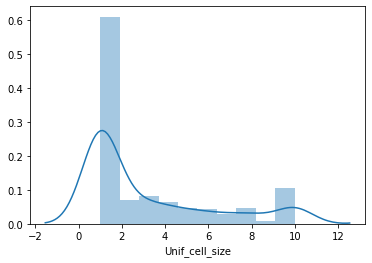

In [99]:
sns.distplot(dt["Unif_cell_size"])

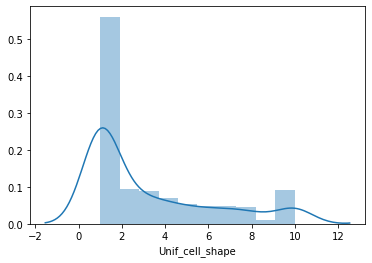

In [100]:
sns.distplot(dt["Unif_cell_shape"])

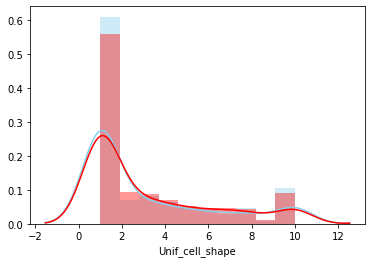

In [101]:
sns.distplot(dt["Unif_cell_size"], color = "skyblue", label = "Unif Cell Size")
sns.distplot(dt["Unif_cell_shape"], color = "red", label = "Unif Cell Shape")

# Prepare Data

In [102]:
dt.describe()

,ID,Clum_thick,Unif_cell_size,Unif_cell_shape,Marg_adhesion,single_epich,Bland_chrom,Norm_nucl,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [103]:
#df[df.id.apply(lambda x: x.isnumeric())]
dt = dt[dt.Bare_nuc.apply(lambda x: x.isnumeric())]

In [104]:
dt.describe()

,ID,Clum_thick,Unif_cell_size,Unif_cell_shape,Marg_adhesion,single_epich,Bland_chrom,Norm_nucl,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [105]:
 dt['Bare_nuc'].astype(str).astype(int)

0       1
1      10
2       2
3       4
4       1
5      10
6      10
7       1
8       1
9       1
10      1
11      1
12      3
13      3
14      9
15      1
16      1
17      1
18     10
19      1
20     10
21      7
22      1
24      1
25      7
26      1
27      1
28      1
29      1
30      1
       ..
669     5
670     8
671     1
672     1
673     1
674     1
675     1
676     1
677     1
678     1
679     1
680    10
681    10
682     1
683     1
684     1
685     1
686     1
687     1
688     1
689     1
690     1
691     5
692     1
693     1
694     2
695     1
696     3
697     4
698     5
Name: Bare_nuc, Length: 683, dtype: int32

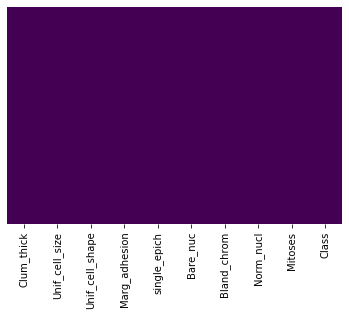

In [106]:
dt.drop(["ID"], axis = 1, inplace = True)
sns.heatmap(dt.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [107]:
dt.dropna(axis=0, inplace=True)

In [108]:
dt.head()

,Clum_thick,Unif_cell_size,Unif_cell_shape,Marg_adhesion,single_epich,Bare_nuc,Bland_chrom,Norm_nucl,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [109]:
x = dt.drop("Class", axis = 1)
y = dt["Class"]

# Split Data to Train and Test

In [110]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
#kfold = model_selection.KFold(n_splits=20, random_state=3)
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=4,test_size=0.3)

# Decision Tree Using Hold-Out

In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

dtree1 = DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=2)
dtree1.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=2, splitter='best')

In [112]:
prediction1 = dtree1.predict(x_test)
print(confusion_matrix(y_test,prediction1))

[[123   9]
 [  3  70]]


In [113]:
print(classification_report(y_test,prediction1))

              precision    recall  f1-score   support

           2       0.98      0.93      0.95       132
           4       0.89      0.96      0.92        73

    accuracy                           0.94       205
   macro avg       0.93      0.95      0.94       205
weighted avg       0.94      0.94      0.94       205



# Random Forest Decision Tree Using Hold-Out

In [114]:
from sklearn.ensemble import RandomForestClassifier

dtree2 = RandomForestClassifier(n_estimators=300, max_depth=None, min_samples_split=2, random_state=0)
dtree2.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [115]:
prediction2 = dtree2.predict(x_test)
print(confusion_matrix(y_test,prediction2))

[[124   8]
 [  2  71]]


In [116]:
print(classification_report(y_test,prediction2))

              precision    recall  f1-score   support

           2       0.98      0.94      0.96       132
           4       0.90      0.97      0.93        73

    accuracy                           0.95       205
   macro avg       0.94      0.96      0.95       205
weighted avg       0.95      0.95      0.95       205



# Calculating The Accuracy Score

In [117]:
scores = model_selection.cross_val_score(dtree1,x, y)
print("Using Decision Tree Method, the accuracy score is", round(scores.mean(),3))
scores = model_selection.cross_val_score(dtree2,x, y)
print("       Using Random Forest, the accuracy score is", round(scores.mean(),3))

Using Decision Tree Method, the accuracy score is 0.931


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


       Using Random Forest, the accuracy score is 0.969


In [118]:
scores = model_selection.cross_val_score(dtree1,x, y, cv = 2)
print("Using Decision Tree Method, the accuracy score is K=1", round(scores.mean(),3))
scores = model_selection.cross_val_score(dtree2,x, y, cv = 2)
print("       Using Random Forest, the accuracy score is K=1", round(scores.mean(),3))

Using Decision Tree Method, the accuracy score is K=1 0.95
       Using Random Forest, the accuracy score is K=1 0.971
